## Analytics of Game results

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import itertools
import json
import re
import sys
sys.path.append('../')

from utils.analytics import *


## Plot mistakes

## Analyze Single Circle for dominated Strategies

In [11]:
path = "/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_0.json"
sample_circle_json = "/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_0.json"
mistakes_result = analyze_circle6(sample_circle_json)
print("Mistake counts from analyze_circle6:", mistakes_result)

=== Mistake 1 ===
Overall: 37/301 (12.3%)
Player 1: 22/172 (12.8%)
Player 2: 15/129 (11.6%)
Round 1: 0/198 (0.0%)
Round 2: 37/84 (44.0%)
Round 3: 0/19 (0.0%)

=== Mistake 2 ===
Overall: 93/301 (30.9%)
Player 1: 51/172 (29.7%)
Player 2: 42/129 (32.6%)
Round 1: 64/198 (32.3%)
Round 2: 29/84 (34.5%)
Round 3: 0/19 (0.0%)

=== Mistake 3 ===
Overall: 0/301 (0.0%)
Player 1: 0/172 (0.0%)
Player 2: 0/129 (0.0%)
Round 1: 0/198 (0.0%)
Round 2: 0/84 (0.0%)
Round 3: 0/19 (0.0%)

=== Mistake 4 ===
Overall: 8/100 (8.0%)
Player 1: 2/100 (2.0%)
Player 2: 6/100 (6.0%)
Round 1: 5/100 (5.0%)
Round 2: 2/100 (2.0%)
Round 3: 1/100 (1.0%)

=== Mistake 5 ===
Overall: 1/100 (1.0%)
Player 1: 1/100 (1.0%)
Player 2: 0/100 (0.0%)
Round 1: 0/100 (0.0%)
Round 2: 0/100 (0.0%)
Round 3: 1/100 (1.0%)

Mistake counts from analyze_circle6: {1: 37, 2: 93, 3: 0, 4: 8, 5: 1}


## Plot Dominated Strats across multiple circles for different LLMs

=== Mistake 1 ===
Overall: 37/301 (12.3%)
Player 1: 22/172 (12.8%)
Player 2: 15/129 (11.6%)
Round 1: 0/198 (0.0%)
Round 2: 37/84 (44.0%)
Round 3: 0/19 (0.0%)

=== Mistake 2 ===
Overall: 93/301 (30.9%)
Player 1: 51/172 (29.7%)
Player 2: 42/129 (32.6%)
Round 1: 64/198 (32.3%)
Round 2: 29/84 (34.5%)
Round 3: 0/19 (0.0%)

=== Mistake 3 ===
Overall: 0/301 (0.0%)
Player 1: 0/172 (0.0%)
Player 2: 0/129 (0.0%)
Round 1: 0/198 (0.0%)
Round 2: 0/84 (0.0%)
Round 3: 0/19 (0.0%)

=== Mistake 4 ===
Overall: 8/100 (8.0%)
Player 1: 2/100 (2.0%)
Player 2: 6/100 (6.0%)
Round 1: 5/100 (5.0%)
Round 2: 2/100 (2.0%)
Round 3: 1/100 (1.0%)

=== Mistake 5 ===
Overall: 1/100 (1.0%)
Player 1: 1/100 (1.0%)
Player 2: 0/100 (0.0%)
Round 1: 0/100 (0.0%)
Round 2: 0/100 (0.0%)
Round 3: 1/100 (1.0%)

=== Mistake 1 ===
Overall: 39/303 (12.9%)
Player 1: 27/173 (15.6%)
Player 2: 12/130 (9.2%)
Round 1: 0/199 (0.0%)
Round 2: 39/86 (45.3%)
Round 3: 0/18 (0.0%)

=== Mistake 2 ===
Overall: 85/303 (28.1%)
Player 1: 51/173 (29.5%

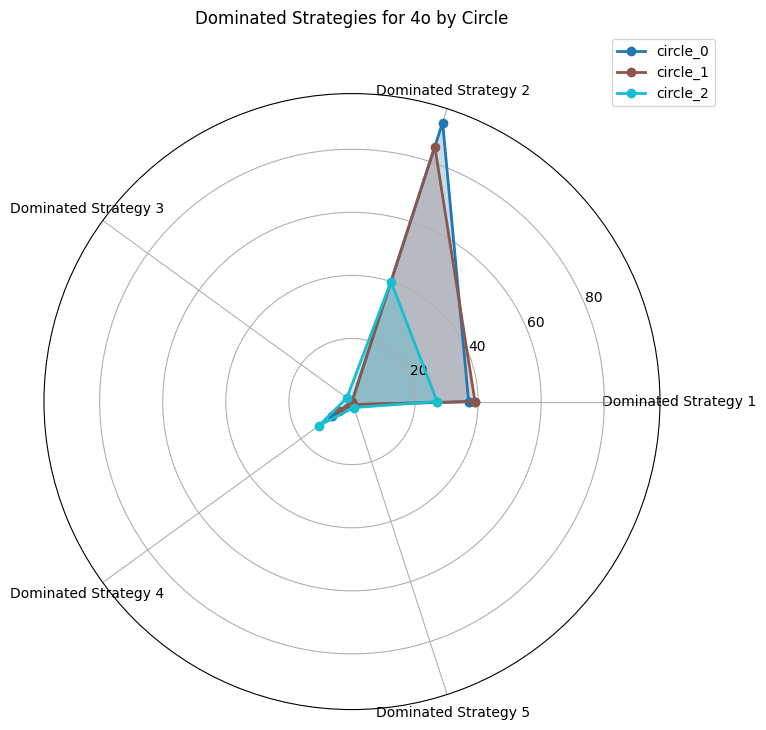

In [12]:
circles = [0, 1, 2]
circles_data = {}
for c in circles:
    path = f"/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_{c}.json"
    mc = analyze_circle6(path)
    circles_data[f"circle_{c}"] = mc
plot_mistakes_radar_multiple_circles(circles_data, model_name="4o")

## Count game actions (ACCEPT, WALK, etc.) for a single circle

In [13]:
stats, num_games = count_game_actions(sample_circle_json)
print_game_action_stats(stats)

Game Stats:      Round 1 Round 2 Round 3   Total      P1      P2
----------------------------------------------------------------
#accepts              42      19       3      64      16      48
#walks                 3      15      16      34      25       9
#invalid walks         1       0       0       1       1       0
#counter offers      152      50       0     202     130      72


##  Aggregate stats over multiple circles

In [14]:
circles = [0, 1, 2]
stats_total = []
for c in circles:
    path = f"/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_{c}.json"
    st, ng = count_game_actions(path)
    stats_total.append((st, ng))
agg_stats, total_games = aggregate_stats_across_circles(stats_total)
print("\nAggregated action counts across circles:\n")
print_game_action_stats(agg_stats)
print("\nAverage actions per game across circles:\n")
print_averages_across_all_games(agg_stats, total_games)



Aggregated action counts across circles:

Game Stats:      Round 1 Round 2 Round 3   Total      P1      P2
----------------------------------------------------------------
#accepts             119      63       7     189      53     136
#walks                14      53      39     106      72      34
#invalid walks         2       2       0       4       3       1
#counter offers      459     132       1     592     382     210

Average actions per game across circles:

Avg Stats:          Round1    Round2    Round3     Total        P1        P2
----------------------------------------------------------------------------
#accepts              0.40      0.21      0.02      0.63      0.18      0.45
#walks                0.05      0.18      0.13      0.35      0.24      0.11
#invalid walks        0.01      0.01      0.00      0.01      0.01      0.00
#counter offers       1.53      0.44      0.00      1.97      1.27      0.70


## Compute and Plot Detailed Metrics

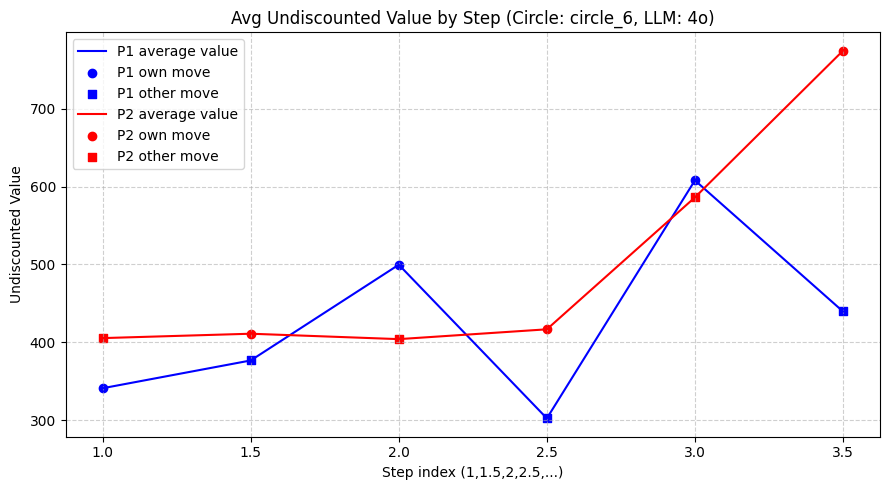

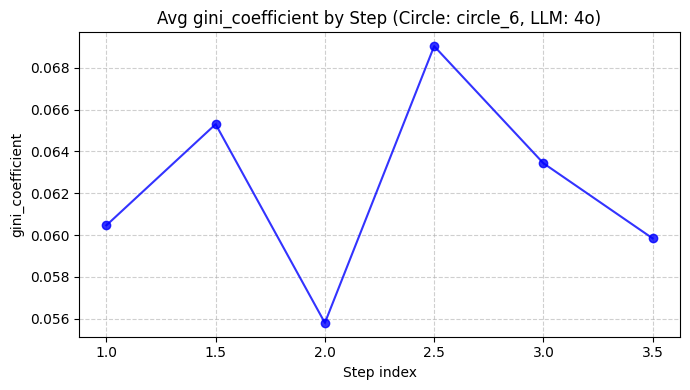

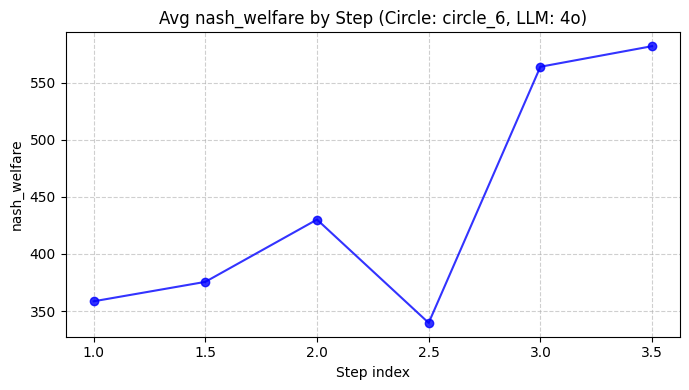

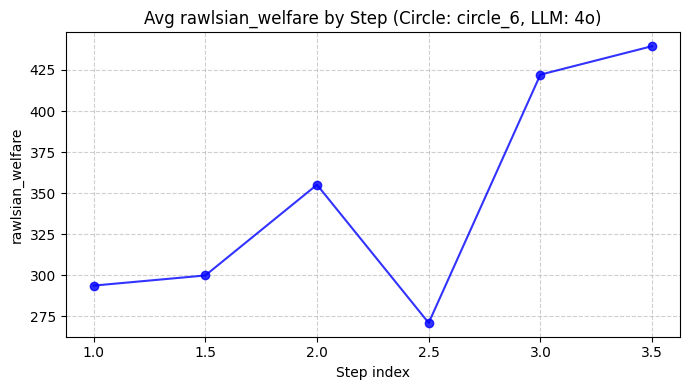

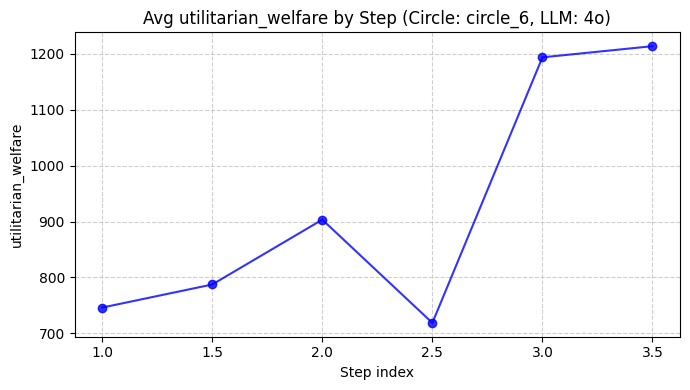

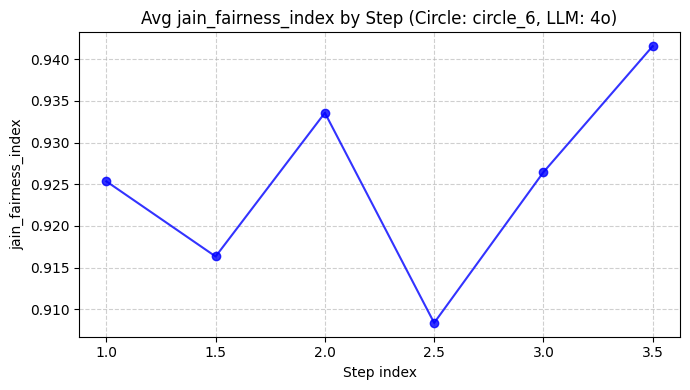

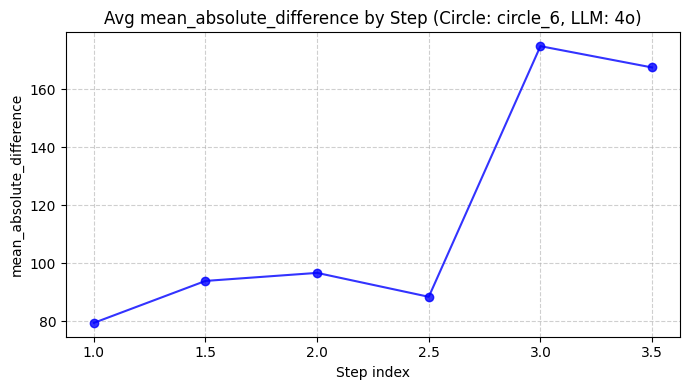

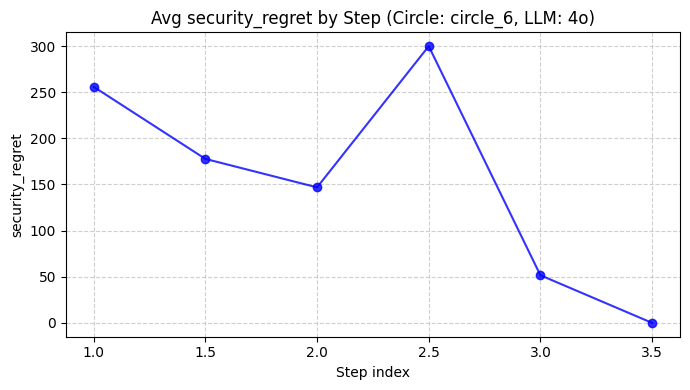

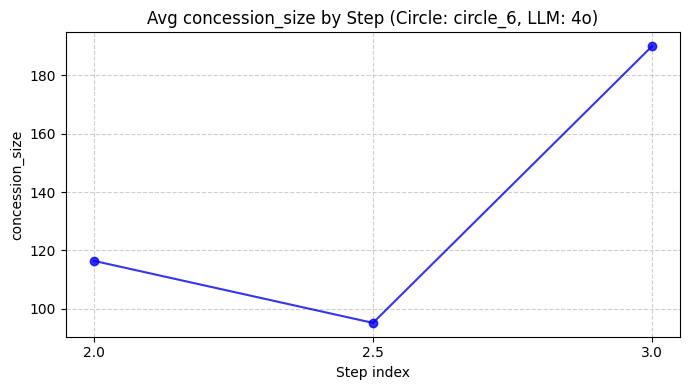

Total step 1: 100
Total step 1.5: 96
Total step 2: 49
Total step 2.5: 21
Total step 3: 13
Total step 3.5: 2
Avg NWE of OUTCOME: 484.848
Avg UWE of OUTCOME: 1029.094
Avg RWE of OUTCOME: 377.417
Avg GINI of OUTCOME: 0.069
Avg JAIN of OUTCOME: 0.910
Avg MAD of OUTCOME: 137.130
Avg SEC of OUTCOME: 14.240
Total ACCEPT: 61
Total WALK: 38
Total COUNTEROFFER: 181
Total INVALID WALK: 1
Avg Game Length: 1.91
Avg Value of Game for P1: 493.81
Avg Value of Game for P2: 535.28


In [15]:
another_circle_json = "/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_6.json"
compute_and_plot_metrics(
    json_file_path=another_circle_json,
    circle_name="circle_6",
    llm_name="4o"
)


## Further Analysis across all circles

In [16]:
analyze_llm_all_circles(
    #base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/gemini_2.0_final/gemini_2.0_1_28_2025_circle_{circle}.json",
    #base_path= "/Users/gabesmithline/Desktop/caif_negotiation/experiments/o3-mini/all_game_data_2_4_2025_100_o3-mini_circle_{circle}.json",
    #base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_{circle}.json",
    #base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_small_final/4o_2_6_2025_100_circle_{circle}_small.json",
    #base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/cross_play/4o_vs_o3/all_game_data_2_9_2025_100_4o_vs_o3_mini_circle_{circle}.json",
    #base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/cross_play/4o_vs_gemini/all_game_data_2_10_2025_100_4o_vs_gemini_2.0_circle_{circle}.json",
    base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/cross_play/4o_vs_o3/all_game_data_2_10_2025_100_o3_mini_vs_4o_circle_{circle}.json",

    circles=range(7),
    llm_name="4o",

)
'''
analyze_llm_all_circles(
    llm_name="4o",
    base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_{circle}.json",
   
     circles=range(7)
)
'''


Results for LLM 4o from /Users/gabesmithline/Desktop/caif_negotiation/experiments/cross_play/4o_vs_o3/all_game_data_2_10_2025_100_o3_mini_vs_4o_circle_{circle}.json
Circle | AvgGameRounds | #Accept | #Walk | #InvalidWalk
0      |          1.44 |     48 |    53 |            0
1      |          1.40 |     55 |    45 |            1
2      |          1.47 |     52 |    47 |            2
3      |          1.53 |     51 |    48 |            2
4      |          1.51 |     53 |    46 |            2
5      |          1.54 |     58 |    42 |            1
6      |          1.58 |     57 |    43 |            1


'\nanalyze_llm_all_circles(\n    llm_name="4o",\n    base_path="/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_{circle}.json",\n   \n     circles=range(7)\n)\n'

## Detailed Metrics

Gemini Circle 0: Rel. Nash Dist
Sample size: 34
Mean: 1.0934, Std: 0.3365
95% CI (bootstrap): [0.9799, 1.2054]
T-test vs 0.5 => T=10.2841, p=0.0000


/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


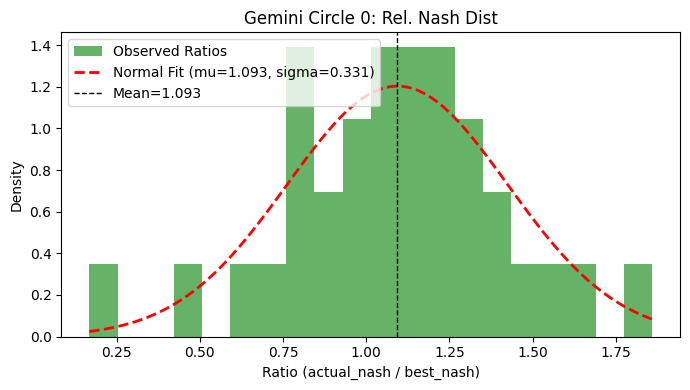

Loaded full script with all computations, including relative max Nash welfare distributions!
Uncomment desired usage examples in __main__ to run them.


In [18]:
circle_0_path = "/Users/gabesmithline/Desktop/caif_negotiation/experiments/4o_final/4o_1_28_2025_100_circle_0.json"

ratios = compute_relative_nash_welfare(circle_0_path)
plot_relative_nash_welfare_distribution(ratios, title="Gemini Circle 0: Rel. Nash Dist")

In [26]:


    # ---------------------------------------------------------------------
    # Example #7: Relative Nash Welfare distribution
    # ---------------------------------------------------------------------
    # circle_0_path = "/path/to/gemini_2.0_1_28_2025_circle_0.json"
    # ratios = compute_relative_nash_welfare(circle_0_path)
    # plot_relative_nash_welfare_distribution(ratios, title="Gemini Circle 0: Rel. Nash Dist")

